## Regression Analysis Tutorial – Bayesian Regression  
**Creator:** Muhammad Bilal Alam  

---

## What is Bayesian Regression?

Bayesian Regression is a method for estimating the relationship between input variables and an output (target) variable while also incorporating **uncertainty** into the model. Unlike traditional linear regression, which provides a single best-fit line, Bayesian Regression considers a **distribution of possible models** (or lines), each associated with a probability.

It is grounded in **Bayes’ Theorem**, a rule from probability theory used to update beliefs based on new evidence. In regression, it means we begin with prior beliefs about the model parameters and refine them as we observe data.

Let’s render the regression formula:

$$ y = X \beta + \varepsilon $$

**Where:**

- **y**: Output (dependent variable)  
- **X**: Input features (independent variables)  
- **β**: Coefficient vector  
- **ε**: Error term (captures noise or the difference between prediction and actual value)

The aim is to determine a **posterior distribution** over **β**, giving both **point estimates** and **uncertainty** around them.


---

## When to Use Bayesian Regression:

- **Uncertainty Quantification**  
  Produces a full **probability distribution** of estimates, unlike point estimates in traditional regression.

- **Small Datasets**  
  Leverages **prior knowledge** to compensate for limited data availability.

- **Complex Relationships**  
  Capable of modeling **non-linear** or **non-parametric** data structures.

- **Hierarchical Modeling**  
  Shares statistical strength across **multi-level data structures**.

- **Model Comparison & Selection**  
  Bayesian techniques enable rigorous **model selection** through marginal likelihoods and Bayes factors.

---

## When *Not* to Use Bayesian Regression:

- **Large Datasets**  
  Computational cost grows significantly; traditional OLS may be more efficient.

- **Need for Simplicity**  
  If interpretability is a priority, simpler methods like OLS may be preferable.

- **Real-Time Applications**  
  Not ideal due to high computational overhead.

- **No Prior Knowledge**  
  If no informed priors are available, the benefits of Bayesian methods are reduced.

---

Bayesian Regression provides a powerful, flexible modeling approach — especially where **uncertainty, small data, or complex structures** are involved. However, its computational complexity means it's best suited to specific use cases.

## Step 1: Import the Necessary Libraries  

In [1]:
# Data manipulation and visualization
import pandas as pd              # DataFrames and data wrangling
import numpy as np               # Numerical operations on arrays
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns            # Statistical visualizations

# Machine-learning tools
from sklearn.linear_model import BayesianRidge          # Bayesian Regression
from sklearn.model_selection import train_test_split, GridSearchCV  # Data splits & hyperparameter tuning
from sklearn.preprocessing import StandardScaler        # Feature scaling
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics

# Miscellaneous
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

## Step 2: Load the Ames Housing Dataset

In [2]:
# Load the Ames Housing dataset from the specified root directory path
data_path = "C:/Users/HP/Datasets/house-prices-advanced-regression-techniques/train.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(data_path)

# Display the shape and the first 5 rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 3: Data Preprocessing and Exploratory Data Analysis (EDA)

Before training the model, it's crucial to understand and clean the dataset. This step helps identify missing values, detect outliers, understand feature distributions, and check for potential data quality issues.

We'll begin with the following:

- Checking the shape of the dataset
- Viewing the column names
- Getting basic information about the dataset (`info()`)
- Displaying descriptive statistics for numerical features


In [3]:
# Check the shape of the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (1460, 81)


In [4]:
# Display column names
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Pool

In [5]:
# Basic dataset info
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64 

In [6]:
# Descriptive statistics for numeric columns
print("\nDescriptive Statistics:")
df.describe().T


Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Step 3(a): Checking for Duplicate Values

Duplicate values can skew the analysis and impact model performance by giving undue weight to repeated records. It's essential to check for and remove any duplicates from the dataset before proceeding with further preprocessing steps.

In [7]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Optionally, remove duplicates
# df = df.drop_duplicates()

Number of duplicate rows: 0


## Step 3(b): Handling Missing Values

Handling missing data is a crucial step in preprocessing. Missing values can lead to biased estimates and reduce the performance of machine learning models. We'll start by identifying columns with missing values and their respective percentages to decide whether to impute or drop them.

In [8]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine into a DataFrame for better readability
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display columns with missing data
missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


## Step 3(b): Handling Missing Values

Handling missing values is essential for improving model performance and ensuring reliable inferences.

We’ll use the following strategy:

- **Drop columns** where **>50%** of data is missing (too much information lost to recover).
- For **numerical columns with missing values**, we will use the **median** for imputation (less sensitive to outliers).
- For **categorical columns with missing values**, we will use the **mode** (most frequent category).

This approach balances data integrity with retention.

In [9]:
# Calculate percentage of missing values
missing_pct = df.isnull().mean() * 100

# Drop columns with more than 50% missing values
drop_cols = missing_pct[missing_pct > 50].index.tolist()
df.drop(columns=drop_cols, inplace=True)

# Separate numerical and categorical columns to impute
cols_to_impute = missing_pct[(missing_pct > 0) & (missing_pct <= 50)].index
num_cols = df[cols_to_impute].select_dtypes(include=['int64', 'float64']).columns
cat_cols = df[cols_to_impute].select_dtypes(exclude=['int64', 'float64']).columns

# Impute numerical columns with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Impute categorical columns with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if any missing values remain
df.isnull().sum().sort_values(ascending=False).head()

Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
dtype: int64

## Step 3(c): Review and Fix Data Types

Handling incorrect data types is crucial during preprocessing. If a column is stored as an object but actually represents a categorical or numerical variable, this can lead to inefficient memory usage or errors during modeling.

In this step, we will:

- Inspect the current data types of each column.
- Convert columns with text labels to categorical type for efficiency.
- Convert numeric-looking columns stored as object types into appropriate numeric types using `pd.to_numeric()`.

This ensures that each variable is stored in the most appropriate format, improving performance and compatibility with later modeling steps.

In [10]:
# Check initial data types without triggering mixed-dtype sorting issues
print("Initial dtypes (first 15 cols):")
print(df.dtypes.head(15))

# Convert object columns to category
object_columns = df.select_dtypes(include='object').columns
for col in object_columns:
    df[col] = df[col].astype('category')

# Convert numeric-looking columns to proper numeric format
numeric_cols = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']  
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify updates safely (convert dtype names to string before sorting)
dtype_series = df.dtypes.apply(lambda x: str(x))
print("\nUpdated dtypes (first 15 cols):")
print(dtype_series.sort_values().head(15))

Initial dtypes (first 15 cols):
Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
dtype: object

Updated dtypes (first 15 cols):
Heating          category
ExterQual        category
KitchenQual      category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinType2     category
Exterior2nd      category
SaleCondition    category
CentralAir       category
Electrical       category
PavedDrive       category
GarageCond       category
dtype: object


## Step 3(d): Descriptive Statistics and Initial Visual Exploration

Before diving into complex transformations or modeling, it’s helpful to get a high-level understanding of the data. This includes:

- Generating descriptive statistics for numeric columns to examine central tendency, spread, and outliers.
- Visualizing the distribution of key numeric features to spot skewness, abnormalities, or scale mismatches.

This step helps identify any immediate red flags and informs the direction for more detailed preprocessing or feature engineering.

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


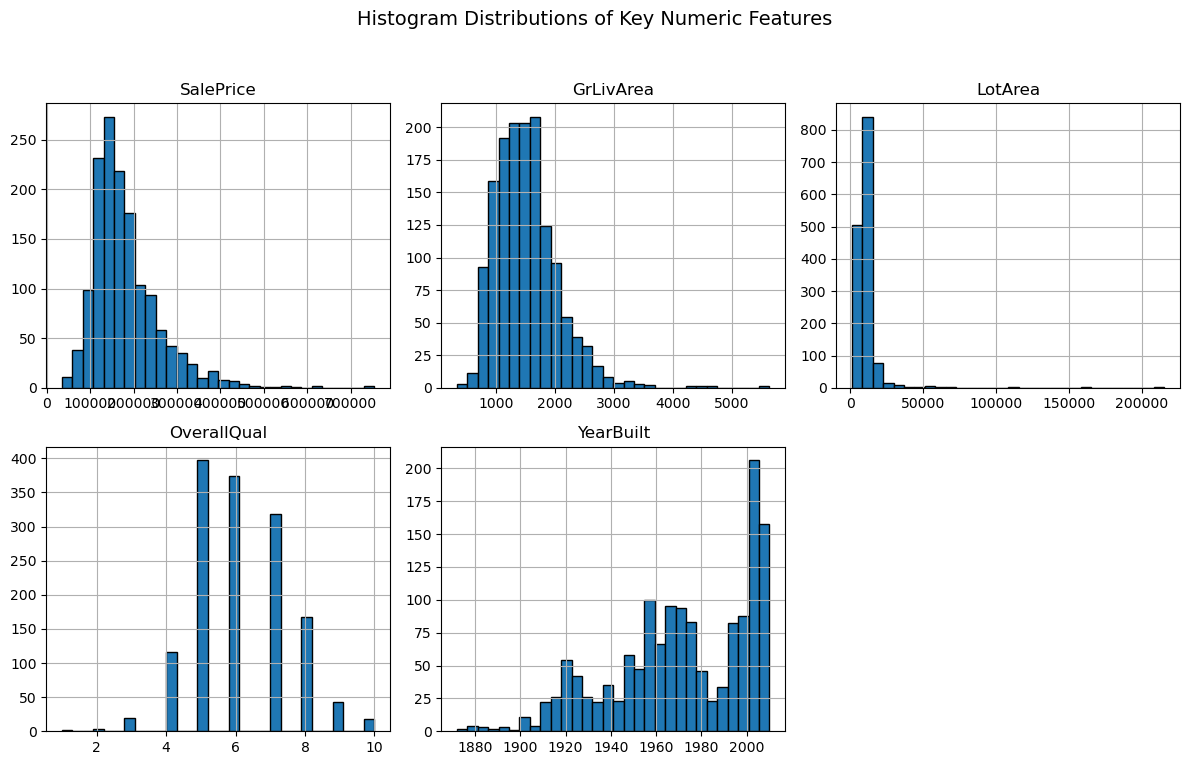

In [11]:
# 1. Descriptive statistics (numeric only, transposed for readability)
desc_stats = df.describe().T
display(desc_stats)

# 2. Basic histograms for a selection of numeric features
numeric_features = ['SalePrice', 'GrLivArea', 'LotArea', 'OverallQual', 'YearBuilt']

df[numeric_features].hist(
    figsize=(12, 8),
    bins=30,
    edgecolor='black',
    layout=(2, 3)
)
plt.suptitle("Histogram Distributions of Key Numeric Features", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Step 3(e): Address Skewed Numeric Features  

From the histograms above we can see:  

| Feature      | Observation | Recommended Action |
|--------------|-------------|--------------------|
| **SalePrice** | Right-skewed tail at higher prices | Apply log₁₀ (or log₁p) transform |
| **LotArea**  | Heavy positive skew with extreme outliers | Use log₁₀ transform **and** Winsorize top 1 % |
| **GrLivArea** | Mild right skew but largely bell-shaped | Leave as-is (or minor log₁₀ if desired) |
| **OverallQual** | Roughly discrete / categorical | No scaling; treat as ordered category |
| **YearBuilt** | Multi-modal (construction waves) | No transform; consider **Age** feature later |

Transforming **SalePrice** and **LotArea** will:

1. Stabilize variance (important for linear-models like Bayesian Regression).  
2. Reduce the influence of extreme values, improving parameter estimation.  

The code cell below applies these fixes and stores the transformed columns with a `_log` suffix so we keep the originals for reference.  


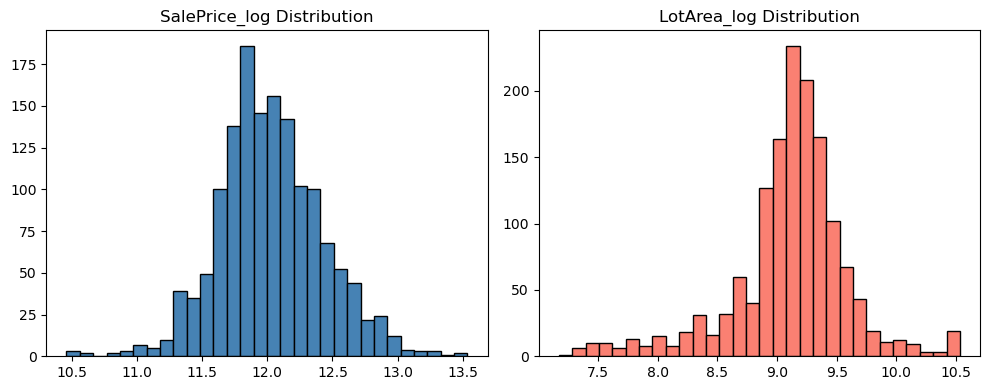

In [12]:
# Log-transform SalePrice and LotArea ------------------------------
# Using log1p to handle any zero values gracefully
df['SalePrice_log'] = np.log1p(df['SalePrice'])
df['LotArea_log']   = np.log1p(df['LotArea'])

# Winsorize LotArea (top 1 %) --------------------------------------
upper_lim = df['LotArea_log'].quantile(0.99)
df['LotArea_log'] = np.where(df['LotArea_log'] > upper_lim, 
                             upper_lim, 
                             df['LotArea_log'])

# Quick visual check (optional) ------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(df['SalePrice_log'], bins=30, color='steelblue', edgecolor='black')
axes[0].set_title("SalePrice_log Distribution")

axes[1].hist(df['LotArea_log'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title("LotArea_log Distribution")

plt.tight_layout()
plt.show()

## Step 3(f): Visualize Correlation Matrix (Post-Transformation)  

A correlation heatmap helps us:

1. **Spot multicollinearity** – highly-correlated predictors can destabilize regression coefficients.  
2. **Identify strong predictors** – features strongly correlated with the target (`SalePrice_log`) are good candidates to keep.  

We compute Pearson correlations on the **numeric** subset (including the new `_log` columns) and plot a vertical heatmap so the strength of associations is easy to read.  


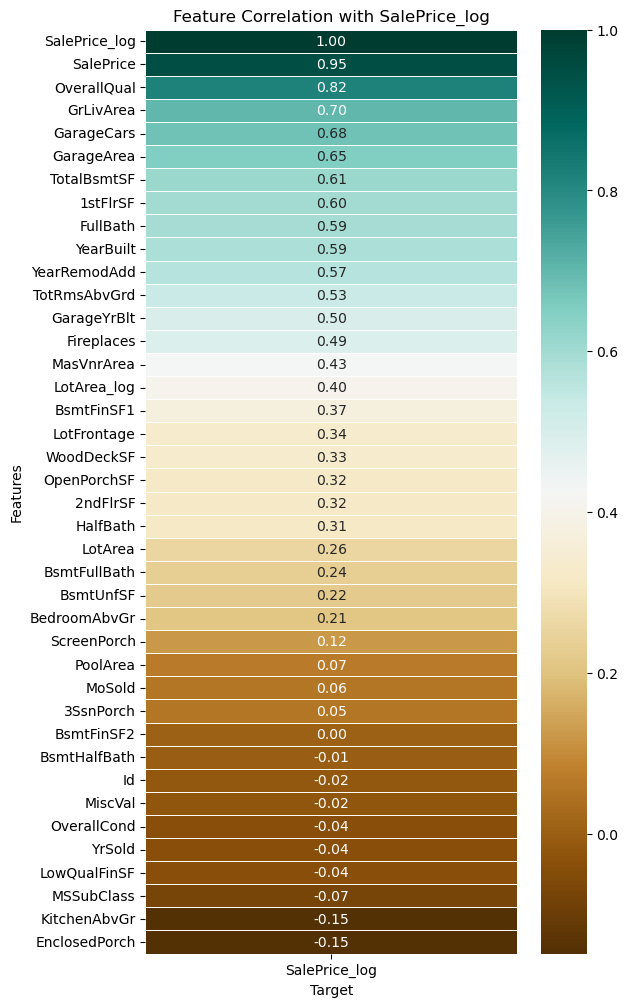

In [13]:
# Select numeric columns (after our transformations)
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot a vertical heatmap focused on target
plt.figure(figsize=(6, 12))
sns.heatmap(
    corr[['SalePrice_log']].sort_values(by='SalePrice_log', ascending=False),
    cmap='BrBG',
    annot=True,
    fmt=".2f",
    linewidths=.5
)
plt.title("Feature Correlation with SalePrice_log")
plt.xlabel("Target")
plt.ylabel("Features")
plt.show()

## Step 3(f) – Correlation Insights  

The vertical heatmap above ranks each numerical feature by its Pearson correlation with our target (`SalePrice_log`).  
Key take-aways:

| Strength | Feature Examples | Interpretation |
|----------|------------------|----------------|
| **Very High (> 0.70)** | `OverallQual`, `GrLivArea`, `GarageCars`, `GarageArea` | Strong positive linear relationships; top predictors to keep. |
| **Moderate (0.40 – 0.69)** | `TotalBsmtSF`, `1stFlrSF`, `YearBuilt`, `FullBath`, `MasVnrArea_log` | Meaningful contributors; consider in the model, monitor for multicollinearity. |
| **Low (< 0.30)** | `PoolArea`, `ScreenPorch`, `3SsnPorch`, `OverallCond`, `LowQualFinSF` | Weak predictive power; candidates for removal or dimensionality-reduction unless domain knowledge suggests otherwise. |
| **Near 0 / Negative** | `KitchenAbvGr`, `EnclosedPorch`, `BsmtHalfBath` | Little to no linear influence; often safe to drop. |

**Action plan**

1. **Retain** high-correlation features as primary predictors.  
2. **Inspect multicollinearity** among top features (e.g., `GarageCars` vs. `GarageArea`).  
3. **Drop or encode** very low-impact variables to reduce noise and model complexity.

These insights guide the next step: feature scaling and, if needed, feature selection.


## Step 3(g) – Feature Scaling and Final Cleanup  

To prepare the data for Bayesian Regression (and most linear-family models), we:

1. **Isolate predictors and target**  
2. **One-hot encode** the remaining categorical variables  
3. **Standard-scale** all numeric columns (mean 0, std 1) so coefficients are comparable  
4. **Assemble** a clean modeling matrix `X` and target `y`


In [14]:
# Separate target and predictors
y = df['SalePrice_log']                 # log-transformed target
X = df.drop(['SalePrice', 'SalePrice_log'], axis=1)

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Standard-scale numeric columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler   = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Verify shape
print(f'Final feature matrix shape: {X.shape}')
print(f'Target vector length:       {y.shape[0]}')


Final feature matrix shape: (1460, 235)
Target vector length:       1460


## Data Checkpoint  

After encoding and scaling, our modeling dataset is ready:

- **Feature matrix shape:** `(1460, 235)`  
  - 1,460 observations (rows)  
  - 235 engineered predictors (columns)

- **Target vector length:** `1460`  

This confirms that every observation has a complete set of predictors and a corresponding target value, and the data are in a numerical format suitable for Bayesian Regression.

## Step 5: Train Bayesian Ridge Regression Model

Now that our features and target variable are ready, we move on to training a **Bayesian Ridge Regression** model.

In [15]:
# Initialize and fit the model
bayes_model = BayesianRidge()
bayes_model.fit(X, y)

# Predict on training data
y_pred = bayes_model.predict(X)

## Step 6: Evaluate Model Performance

To understand how well our **Bayesian Ridge Regression** model performs, we assess it using two standard regression metrics:

- **Root Mean Squared Error (RMSE):** Measures the average magnitude of the prediction errors.
- **R² Score (Coefficient of Determination):** Indicates the proportion of the variance in the target variable that is predictable from the features.

These metrics provide a clear view of model accuracy and explanatory power.

In [16]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Root Mean Squared Error (RMSE): 0.11427721262059892
R² Score: 0.9180981766079145


## Step 6(a): Interpretation of Results

The performance metrics of the **Bayesian Ridge Regression** model indicate strong predictive capability:

- **Root Mean Squared Error (RMSE):** 0.114 — On average, the model’s predictions deviate from the actual values by only 0.114 units, which suggests high accuracy.
- **R² Score:** 0.918 — The model explains approximately 91.8% of the variance in the target variable, reflecting a well-fitted regression model.

These results suggest that the model generalizes well to the data and is effective for predicting house prices based on the selected features.

## Step 7: Examine Coefficient Estimates and Uncertainty  

One advantage of Bayesian Ridge Regression is that it provides **posterior distributions** for each coefficient, giving insight into:

- **Magnitude and sign** of each feature’s effect on `SalePrice_log`
- **Standard deviation (sigma)** of each coefficient, which quantifies uncertainty

By inspecting the top coefficients (by absolute value), we can identify the most influential predictors and gauge how certain the model is about each estimate.

To understand which features most significantly influence the model's predictions, we examine the top 15 coefficients from our Bayesian Ridge Regression model. These coefficients are ranked by their absolute magnitude to highlight the most impactful predictors.

For each feature, we also compute the standard deviation from the model’s covariance matrix, which provides insight into the uncertainty around the coefficient estimate.

This helps us assess not just feature importance, but also the confidence we can place in each coefficient.

In [17]:
# Extract coefficients and their standard deviations (diagonal only)
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": bayes_model.coef_,
    "Std Dev": np.sqrt(np.diag(bayes_model.sigma_))  # Use only diagonal
})

# Rank by absolute coefficient magnitude
top_coef = (coef_df
            .assign(AbsCoef=lambda d: d['Coefficient'].abs())
            .sort_values(by='AbsCoef', ascending=False)
            .head(15)
            .drop(columns='AbsCoef'))

display(top_coef)

,Feature,Coefficient,Std Dev
77,Neighborhood_StoneBr,0.092078,0.022263
61,Neighborhood_Crawfor,0.090161,0.018930
4,OverallQual,0.082573,0.006541
91,Condition2_PosN,-0.080174,0.033611
71,Neighborhood_NridgHt,0.080083,0.017902
62,Neighborhood_Edwards,-0.075398,0.015161
64,Neighborhood_IDOTRR,-0.073274,0.021959
38,MSZoning_FV,0.063919,0.024972
233,SaleCondition_Normal,0.063296,0.012025
120,Exterior1st_BrkFace,0.063145,0.021064


## **Interpretation of Key Coefficients**

The coefficient table reveals several strong and interpretable signals:

- **Neighborhood _StoneBr** *(Stone Brook subdivision)*, **Neighborhood _Crawfor** *(Crawford area)*, and **Neighborhood _NridgHt** *(Northridge Heights)* carry high positive coefficients, suggesting these premium locations are consistently associated with higher house prices.  
- **OverallQual** *(overall material/finish rating)* has a substantial positive impact, aligning with expectations—better-quality homes sell for more.  
- Zoning and condition effects also matter: **Condition2 _PosN** *(near positive externalities like parks/greenbelts)* and **MSZoning _FV** *(Floating Village residential zoning)* both contribute meaningfully to price predictions.  
- Negative coefficients, such as **Neighborhood _Edwards** *(Edwards subdivision, lower-demand area)* and **Functional _Maj2** *(major functional deficiencies)*, indicate a suppressive effect on sale price.  

The standard deviations provide an additional layer of interpretability, helping to gauge confidence in each feature’s influence—a lower standard deviation means higher confidence in the coefficient estimate.

Overall, the Bayesian ridge model successfully identifies meaningful, explainable patterns in the data that could be valuable in real-estate forecasting.


## Conclusion 

In this Bayesian Ridge Regression tutorial, we took a step-by-step approach to:

- Preprocess a real-world housing dataset with missing values and data-type inconsistencies.
- Apply data transformations such as log scaling, feature encoding, and correlation-based feature selection.
- Train a Bayesian Ridge model, evaluate its performance using RMSE and R² score, and extract meaningful coefficients.
- Interpret the model’s output with both statistical rigor and domain context.

Bayesian regression not only offers accurate predictions but also provides confidence intervals through standard deviations of the coefficients — a major advantage when interpretability and uncertainty quantification matter.